In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_json("clean_reviews.json", orient='records')

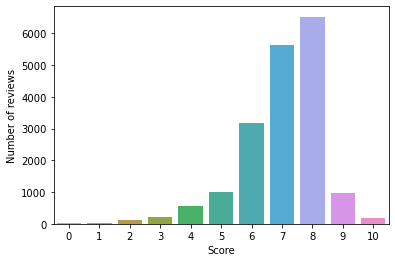

In [3]:
scores = np.round(np.array(data['score']))

amount = []
for i in range(11):
    amount.append(np.count_nonzero(scores == i))

ide = np.array([i for i in range(11)])

df = pd.DataFrame({'Score':ide, 'Number of reviews':amount})
sns.barplot(data = df, x = 'Score', y = 'Number of reviews')
plt.savefig("Scores.png")

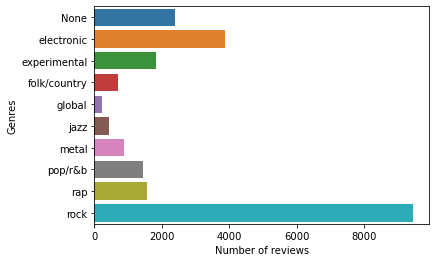

In [4]:
genres = np.array(list(map(str, data['genre'])))
for a in np.flatnonzero(np.core.defchararray.find(genres,'|')!=-1):
    string = genres[a]
    split = np.array(string.split("|"))
    genres = np.concatenate((genres, split))
    
genress = np.take(genres, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))
unique = np.unique(genress)
amount = []
for name in unique:
    amount.append(np.count_nonzero(genress == name))
    
amount = np.array(amount)

df = pd.DataFrame({'Genres':unique, 'Number of reviews':amount})
sns.barplot(data = df, y = 'Genres', x = 'Number of reviews')
plt.savefig('Genres.png')

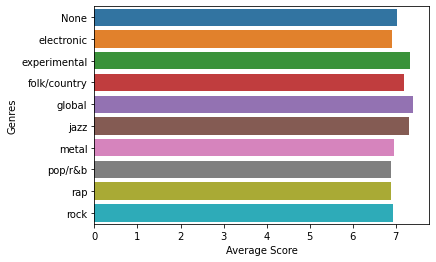

In [5]:
genres = np.array(list(map(str, data['genre'])))
rating = list(data['score'])
for a in np.flatnonzero(np.core.defchararray.find(genres,'|')!=-1):
    string = genres[a]
    split = np.array(string.split("|"))
    genres = np.concatenate((genres, split))
    for i in split:
        rating.append(rating[a])

ratings = np.array(rating)
rating = np.take(ratings, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))
genress = np.take(genres, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))

unique = np.unique(genress)
amount = []
for name in unique:
    amount.append(np.average(rating[genress == name]))
    
amount = np.array(amount)

df = pd.DataFrame({'Genres':unique, 'Average Score':amount})
sns.barplot(data = df, y = 'Genres', x = 'Average Score')
plt.savefig('GenresXScores.png')

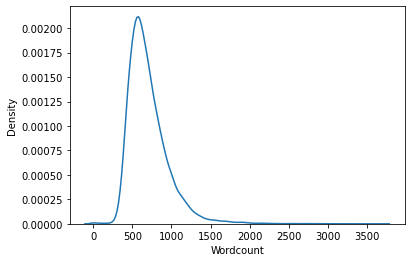

In [6]:
reviews = np.array(data['review_content'])
wordcounts = np.array([len(r.split(' ')) for r in reviews])
ratings = np.array(data['score'])
genresss = np.array(list(map(str, data['genre'])))

sns.kdeplot(wordcounts)
plt.xlabel("Wordcount")
plt.savefig("distributionWordCounts.png")

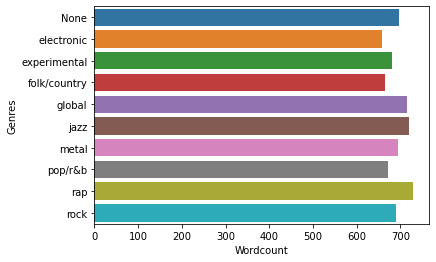

In [7]:
reviews = np.array(data['review_content'])
wordcounts = np.array([len(r.split(' ')) for r in reviews])
ratings = np.array(data['score'])

genresss = np.array(list(map(str, data['genre'])))

wordcount = wordcounts[wordcounts > 200]
rating = ratings[wordcounts > 200]
genres = genresss[wordcounts > 200]
rating = rating[wordcount < 1500]
genres = genres[wordcount < 1500]
wordcount = wordcount[wordcount < 1500]

count = list(wordcount)
for a in np.flatnonzero(np.core.defchararray.find(genres,'|')!=-1):
    string = genres[a]
    split = np.array(string.split("|"))
    genres = np.concatenate((genres, split))
    for i in split:
        count.append(count[a])
    
counts = np.array(count)
count = np.take(counts, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))
genress = np.take(genres, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))
unique = np.unique(genress)
amount = []


for name in unique:
    amount.append(np.average(count[genress == name]))
    
amount = np.array(amount)


df = pd.DataFrame({'Genres':unique, 'Wordcount':amount})
sns.barplot(data = df, y = 'Genres', x = 'Wordcount')
plt.savefig('WordCountXGenres.png')

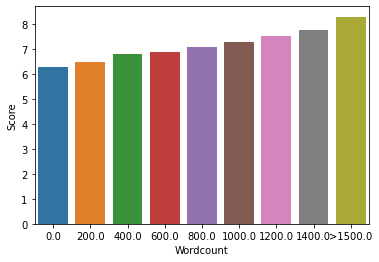

In [8]:
reviews = np.array(data['review_content'])
wordcounts = np.array([len(r.split(' ')) for r in reviews])
ratings = np.array(data['score'])

wordcount = wordcounts[wordcounts > 200]
rating = ratings[wordcounts > 200]
rating = rating[wordcount < 1500]
wordcount = wordcount[wordcount < 1500]


scores = np.round(wordcount.astype(int)/200)*200
unique = np.unique(scores)
amount = [np.count_nonzero(wordcounts <= 200)]
r = [np.average(ratings[wordcounts <= 200])]
for i in unique:
    amount.append(np.count_nonzero(scores == i))
    r.append(np.average(rating[scores == i]))


amount.append(np.count_nonzero(wordcounts >= 1500))
r.append(np.average(ratings[wordcounts >= 1500]))
amount = np.array(amount)
unique = np.concatenate((np.array([0.0]), unique))
unique = np.concatenate((unique, np.array([">1500.0"])))

df = pd.DataFrame({'Wordcount':unique, 'y':amount, 'Score':r })
sns.barplot(data = df, x = 'Wordcount', y = 'Score')

plt.savefig("WordCountsXScore.png")